# 8 Review of `rampup-v1` with SB3's PPO implementation

In [1]:
import numpy as np
import gym
from gym import spaces
from stable_baselines3 import PPO
from plan_opt.demand import Demand
from plan_opt.envs.rampup1 import RampupEnv1 as RampupEnv

Seed is 3348
Period is 1095
Sudden change:
    Start: 424
    Magnitude: 1029.305226873561
    Steepness: 36.97791532270635
    Direction: UP


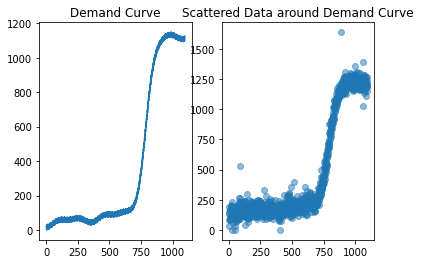

In [2]:
D = Demand(seed=3348)
D.generate_demand()
D.add_sudden_change()
D.info()
D.show()

### Create the environment
The action space is descrete, only categorical changes of equipment are allowed.

In [3]:
env = RampupEnv(demand=D)

### Train the model

In [4]:
%%time
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=2500)

Using cpu device
Wrapping the env in a DummyVecEnv.
-----------------------------
| time/              |      |
|    fps             | 1971 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
--------------------------------------------
| time/                   |                |
|    fps                  | 1516           |
|    iterations           | 2              |
|    time_elapsed         | 2              |
|    total_timesteps      | 4096           |
| train/                  |                |
|    approx_kl            | -2.6028778e-05 |
|    clip_fraction        | 0              |
|    clip_range           | 0.2            |
|    entropy_loss         | -1.39          |
|    explained_variance   | -2.42e+10      |
|    learning_rate        | 0.0003         |
|    loss                 | 1.27e+09       |
|    n_updates            | 10             |
|    policy_gradient_loss | -0.00326       |
|    value_loss   

### Predict

In [5]:
obs = env.reset()
for i in range(10000):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    if done:
        env.render()
        obs = env.reset()

# env.close()
# env.render()

Reward so far: 10475500
Economic potential: 16205500
Lost potential: 5730000 (35.3584%)

Reward so far: 10881000
Economic potential: 16205500
Lost potential: 5324500 (32.8561%)

Reward so far: 16196500
Economic potential: 16205500
Lost potential: 9000 (0.0555%)

Reward so far: 2640000
Economic potential: 16205500
Lost potential: 13565500 (83.7092%)

Reward so far: 10033000
Economic potential: 16205500
Lost potential: 6172500 (38.0889%)

Reward so far: 13536000
Economic potential: 16205500
Lost potential: 2669500 (16.4728%)

Reward so far: 8953000
Economic potential: 16205500
Lost potential: 7252500 (44.7533%)

Reward so far: 15165000
Economic potential: 16205500
Lost potential: 1040500 (6.4207%)

Reward so far: 3944000
Economic potential: 16205500
Lost potential: 12261500 (75.6626%)

Reward so far: 2684000
Economic potential: 16205500
Lost potential: 13521500 (83.4377%)

Reward so far: 8413000
Economic potential: 16205500
Lost potential: 7792500 (48.0855%)

Reward so far: 4229500
Econo

In [6]:
def evaluate(model, num_steps=1000):
    """
    Evaluate a RL agent
    :param model: (BaseRLModel object) the RL Agent
    :param num_steps: (int) number of timesteps to evaluate it
    :return: (float) Mean reward for the last 100 episodes
    """
    episode_rewards = [0.0]
    obs = env.reset()
    for i in range(num_steps):
        # _states are only useful when using LSTM policies
        action, _states = model.predict(obs)

        obs, reward, done, info = env.step(action)

        # Stats
        episode_rewards[-1] += reward
        if done:
            obs = env.reset()
            episode_rewards.append(0.0)
    # Compute mean reward for the last 100 episodes
    mean_100ep_reward = round(np.mean(episode_rewards[-100:]), 1)
    print("Mean reward:", mean_100ep_reward, "Num episodes:", len(episode_rewards))

    return mean_100ep_reward

In [7]:
# Evaluate the trained agent
mean_reward = evaluate(model, num_steps=10000)

Mean reward: 1620050.0 Num episodes: 20


In [8]:
model.policy

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten()
  )
  (mlp_extractor): MlpExtractor(
    (shared_net): Sequential()
    (policy_net): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=15, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=4, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)

In [9]:
model.learning_rate

0.0003